In [1]:
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

from IPython.display import display, Markdown

Population mean is  1.50136
Population std is  1.2258458917824866
Population variance is  1.5026981503999999


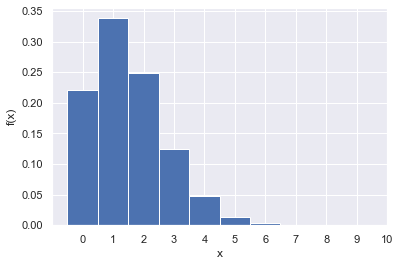

In [16]:
#let's recall the Poisson sample

#Let's say that the number of mutations is 1.5 per hour (could be different time unit)

lamb=1.5
population=stats.poisson.rvs(lamb,size=100000)
#let's sample the number of mutations per <fill here> in a bacterial colony
my_bins=[0,1,2,3,4,5,6,7,8,9,10]
fig=plt.hist(population,bins=my_bins,align="left",density=True)
population_mean=np.mean(population)
population_std=np.std(population,ddof=0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xticks(my_bins)
print("Population mean is ",population_mean)
print("Population std is ",population_std)
print("Population variance is ",population_std**2)

Note that in Poisson distribution:

$\mu=\lambda$ 

and

$\sigma^2=\lambda$

## Let's sample this ditribution and plot the histogram of sample means, 

## along with the population distribution histogram.


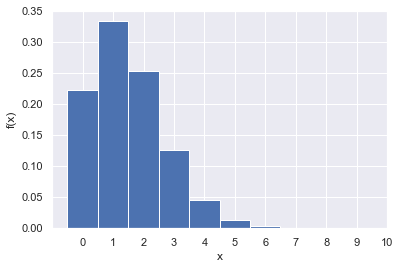

In [9]:
#First plot the population histogram, transparently (alpha=0.3)
fig=plt.hist(population,bins=my_bins,align="left",density=True, alpha=1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xticks(my_bins)
 
plt.show()    

In [10]:
#Sample the distribution

#let's do thousand samples with sample size 10 in each sample, and calculate means
sample_size=10
n_samples=10000
x_bar=np.zeros(n_samples)
for i in range(n_samples):
    sample=np.random.choice(population,sample_size)
    for j in range(sample_size):
        x_bar[i]+=sample[j]/sample_size

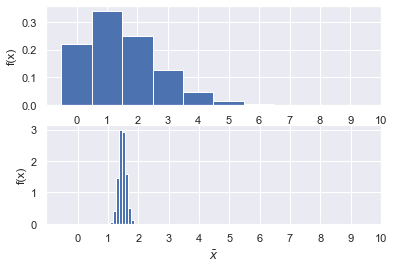

In [25]:
#First plot the population histogram, transparently (alpha=0.3)
fig, ax=plt.subplots(2)
ax[0].hist(population,bins=my_bins,align="left",density=True, alpha=1.0)
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[0].set_xticks(my_bins)

#Now plot the histogram of x_bar
my_bins2=np.arange(-0.5,9.5,0.1)
ax[1].hist(x_bar,bins=my_bins2, align="left",density=True,alpha=1.0)
ax[1].set_xlabel(r'$\bar{x}$')
ax[1].set_ylabel('f(x)')
ax[1].set_xticks(my_bins)

plt.show()    

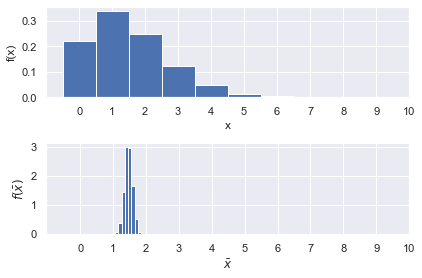

In [26]:
#Let's do n=100
#let's do thousand samples with sample size 100 in each sample, and calculate means
sample_size=100
n_samples=10000
x_bar=np.zeros(n_samples)
for i in range(n_samples):
    sample=np.random.choice(population,sample_size)
    for j in range(sample_size):
        x_bar[i]+=sample[j]/sample_size
        
#First plot the population histogram, transparently (alpha=0.3)
fig, ax=plt.subplots(2)
ax[0].hist(population,bins=my_bins,align="left",density=True, alpha=1.0)
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[0].set_xticks(my_bins)

#Now plot the histogram of x_bar
my_bins2=np.arange(-0.5,9.5,0.1)
ax[1].hist(x_bar,bins=my_bins2, align="left",density=True,alpha=1.0)
ax[1].set_xlabel(r'$\bar{x}$')
ax[1].set_ylabel(r'$f(\bar{x})$')
ax[1].set_xticks(my_bins)

fig.tight_layout(pad=1.0)

plt.show()    

In [ ]:
#Let's calculate the mean and standard deviation of the pupulation and sample means

print("The population mean is ",np.mean(population))
print("The sample means mean is ",np.mean(x_bar))
print("The population standard deviation is ",np.std(population,ddof=0))
print("The sample means standard deviation is ",np.std(x_bar,ddof=0))
print("Calculated from the population std/sqrt(n) is ", np.std(population,ddof=0)/np.sqrt(sample_size))

### Recall the notation

Population mean:

$\mu=1.50363$

Sample means mean:

$\mu_{\bar{x}}=1.50422$

Population standard deviation:

$\sigma=1.229$

The sample means standard deviation:

$\sigma_{\bar{x}}=0.123$

The sample size:

$n=100$

The samples means standard deviation calculated from the population standard deviation:

$\frac{\mu}{\sqrt{n}}=\frac{1.229}{\sqrt{100}}=0.1229$

### How about the sample standard deviation s?

Note that the above parameters and statistics are single values.

### Important!

$\bar{x}$ is a random variable, with its own distribution (normal, no matter what the population distribuiton is).

$s$ is also a random variable. It gets many values. It has its own distribution.

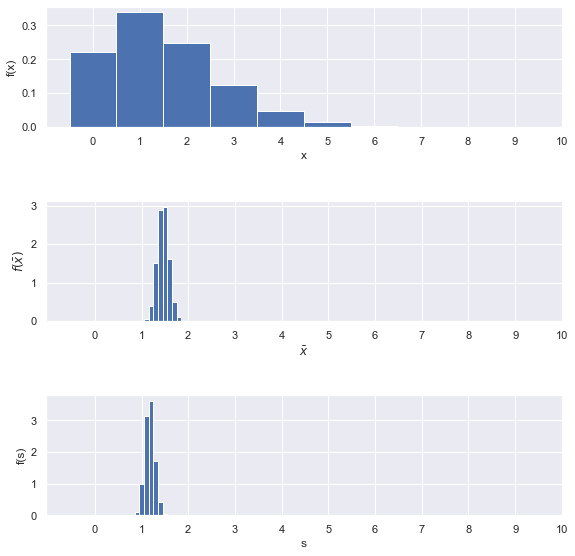

In [30]:
#Let's plot the distribution of s

#Let's do n=100
#let's do thousand samples with sample size 100 in each sample, and calculate means
sample_size=100
n_samples=10000
x_bar=np.zeros(n_samples)
s=np.zeros(n_samples)
for i in range(n_samples):
    sample=np.random.choice(population,sample_size)
    x_bar[i]=np.mean(sample)
    s[i]=np.std(sample,ddof=1)

#First plot the population histogram, transparently (alpha=0.3)
fig, ax=plt.subplots(3)

ax[0].hist(population,bins=my_bins,align="left",density=True, alpha=1.0)
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[0].set_xticks(my_bins)

#Now plot the histogram of x_bar
my_bins2=np.arange(-0.5,9.5,0.1)
ax[1].hist(x_bar,bins=my_bins2, align="left",density=True,alpha=1.0)
ax[1].set_xlabel(r'$\bar{x}$')
ax[1].set_ylabel(r'$f(\bar{x})$')
ax[1].set_xticks(my_bins)

my_bins2=np.arange(-0.5,9.5,0.1)
ax[2].hist(s,bins=my_bins2, align="left",density=True,alpha=1.0)
ax[2].set_xlabel('s')
ax[2].set_ylabel('f(s)')
ax[2].set_xticks(my_bins)


fig.tight_layout(pad=0.01)

fig.set_figheight(8)
fig.set_figwidth(8)

plt.show()    

### Remember, one single sample has n=100  individual x values



In [31]:
#Let's sample again
sample_size=10
n_samples=5
x_bar=np.zeros(n_samples)
s=np.zeros(n_samples)
sample=np.zeros([n_samples,sample_size])
for i in range(n_samples):
    sample[i,:]=np.random.choice(population,sample_size)
    x_bar[i]=np.mean(sample[i,:]) #calculate sample means
    s[i]=np.std(sample[i,:],ddof=1)

In [32]:
print("The samples are:")
print(sample)
print("The sample means are:")
print(x_bar)
print("The sample standard deviations are:")
print(s)

The samples are:
[[2. 0. 2. 1. 2. 1. 0. 4. 4. 1.]
 [0. 4. 5. 0. 1. 5. 3. 1. 1. 1.]
 [2. 1. 5. 1. 1. 4. 1. 1. 1. 1.]
 [2. 1. 1. 1. 1. 1. 0. 0. 1. 0.]
 [2. 2. 1. 2. 1. 1. 0. 1. 2. 1.]]
The sample means are:
[1.7 2.1 1.8 0.8 1.3]
The sample standard deviations are:
[1.418 1.969 1.476 0.632 0.675]


### So, when we calculate the z-scores, we have only one random variable in them, the sample mean:

$z=\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$

$\mu$, $\sigma$ and $n$ are constant numbers, parameters of the population and sample size.

$\bar{x}$ is different for each sample. It is a random variable that gets many values. How many?

### When we calculate the t-scores, we have two random variables in each t-score:

### the sample mean AND the sample standard deviation! 

$t=\frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$

Only $\mu$ and $n$ are constant numbers, parameter of the population and sample size.

$\bar{x}$ and $s$ arw both different for each sample. They are both random variables that get many values. How many?


## This is why, the t-distribution is not the same as the z-distribution!

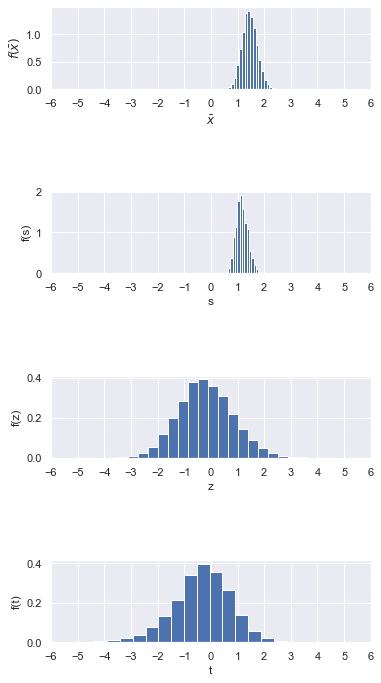

In [111]:
#Let's calculate the z and t values

#First sample, and calculate x_bar(s) and s(s)
sample_size=20
n_samples=10000
x_bar=np.zeros(n_samples)
s=np.zeros(n_samples)
for i in range(n_samples):
    sample=np.random.choice(population,sample_size)
    x_bar[i]=np.mean(sample)
    s[i]=np.std(sample,ddof=1)

#We know mu is 1.5, we know sigma is 1.5
mu=1.5*np.ones(n_samples)
sigma=np.sqrt(1.5)*np.ones(n_samples)


#First calculate z(s)
z=(x_bar-mu)/(sigma/np.sqrt(sample_size))

#Then calculate the t(s)
t=(x_bar-mu)/(s/np.sqrt(sample_size))

#Now plot x_bar, s, z and t
fig1, ax=plt.subplots(4)

#Now plot the histogram of x_bar
ticks=np.arange(-6.0,7.0,1.0)


#my_bins_nar=np.arange(-3.0,3.3,0.3)
my_bins_nar=20

ax[0].hist(x_bar,bins=my_bins_nar, align="left", density=True,stacked=True,alpha=1.0)
ax[0].set_xlabel(r'$\bar{x}$')
ax[0].set_ylabel(r'$f(\bar{x})$')
ax[0].set_xticks(ticks)

#Histogram of s
ax[1].hist(s,bins=my_bins_nar, align="left",density=True,alpha=1.0)
ax[1].set_xlabel('s')
ax[1].set_ylabel('f(s)')
ax[1].set_xticks(ticks)

#Histogram of z
ax[2].hist(z,bins=my_bins_nar, align="left",density=True, alpha=1.0)
ax[2].set_xlabel('z')
ax[2].set_ylabel('f(z)')
ax[2].set_xticks(ticks)

#Histogram of t
ax[3].hist(t,bins=my_bins_nar, align="left",density=True, alpha=1.0)
ax[3].set_xlabel('t')
ax[3].set_ylabel('f(t)')
ax[3].set_xticks(ticks)

ax[3].set_xlim([-6,6])
fig1.tight_layout(pad=0.01)

fig1.set_figheight(10)
fig1.set_figwidth(5)

#fig1.show()    

